# Convex Optimization

Preamble: Run the cells below to import the necessary Python packages

<!-- *This notebook created by William Gilpin. Consult the [course website](https://www.wgilpin.com/cphy) for all content and [GitHub repository](https://github.com/williamgilpin/cphy) for raw files and runnable online code.* -->

Open this notebook in Google Colab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/williamgilpin/cphy/blob/main/talks/convex_optimization_univariate.ipynb)

In [1]:
import numpy as np
from IPython.display import Image, display

import matplotlib.pyplot as plt
%matplotlib inline


### Optimization


The cost function, fitness, or loss is usually a scalar function that measure performance in a task. Examples include:
+ The energy of a physical system
+ Error of a neural network on training data
+ The fitness of a genotype
+ The stability of a folded protein configuration
+ Whether a given spin configuration is a true ground state or metastable
+ Loss landscapes in 

In machine learning, loss functions are usually conditioned on a finite dataset , forming the *empirical risk*. However,  with more data the empirical risk converges to the true risk.

<br>
<br>
<br>

Global optimization is the problem of finding the absolute minimum of a cost function. The easiest way to do this is to query the function at every point in the input space, and return the minimum value. However, this can often be infeasible, since the input space is often high-dimensional and continuous. However, if we can constrain the class of functions that describe our optimization problem, we may be able to discover the global minimum, and prove that it is indeed the global minimum, without exhaustive search. **Convex optimization** is one class of problems with particularly nice properties, because any local minimum that we discover for a convex loss is also a global minimum.

There are diverse examples of *non-convex* optimization problems, for which there are fewer guarantees that any local minimum we find is a global minimum, or even a particularly deep minimum on a landscape. The absolute hardest non-convex problems are NP-hard, meaning that the time required to solve them scales exponentially with problem size. This condition is equivalent to the case where there is no more efficient way to find the global minimum than checking every single configuration. Examples of NP-hard problems include the traveling salesman problem, integer programming, finding the ground state of a spin glass, many Sudoku puzzles, and even certain levels in [Donkey Kong Country](https://doi.org/10.1016/j.tcs.2015.02.037).


Text(0.5, 0, 'x')

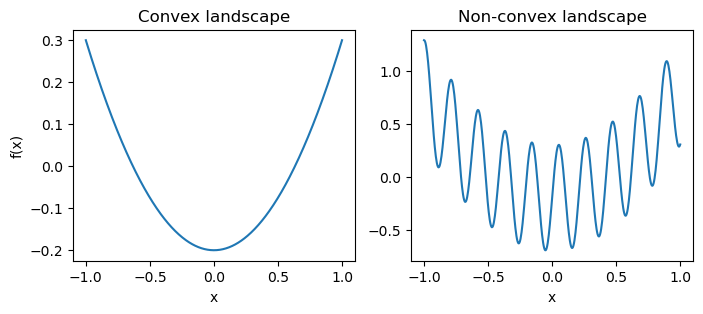

In [11]:
xx = np.linspace(-1, 1, 500)

f_con = lambda x: 0.5 * x**2 - 0.2
f_noncon = lambda x :  x**2 + 0.5 * np.sin(30 * x) - 0.2

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(xx, f_con(xx))
plt.title('Convex landscape')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(xx, f_noncon(xx))
plt.title('Non-convex landscape')
plt.xlabel('x')


# One dimensional optimization: fixed point methods and rootfinding

Given some function $f(x)$, and we want to calculate the global minimum (convex), or at least the nearest local minimum to a start point in the case of non-convex functions. In one-dimension, if we use our standard approach of finding the nearest point at which $f' = 0$, reducing the calculation to an equality, for which we can use rootfinding methods to find the minimum.

$$
    x^* = \arg \min_x f(x) \implies f'(x^*) = 0
$$

However, if the function $f(x)$ has a complex form, we cannot necessarily find the roots analytically. If we have a polynomial with multiple roots, we can find the roots one at a time using the [Durand-Kerner method](https://en.wikipedia.org/wiki/Durand%E2%80%93Kerner_method).

<br><br><br><br><br><br><br><br><br><br>




## Local optimization

### Gradient descent

Gradient descent is a first-order method that resembles a ball rolling down a landscape. It has several appealing properties. It is considered a first-order method because it only requires the first derivative of the loss function locally, rather than higher-order derivatives or global information about the landscape.


Starting from an arbitrary point on the landscape, take steps along the direction of steepest descent

$$
    x \leftarrow x - \eta \dfrac{df}{dx}
$$

The learning rate is a "hyperparameter" that we choose based on problem knowledge. If this is set too large, we can get stuck in oscillating solutions around the optima. If we set it too small, and the system takes a long time to converge.

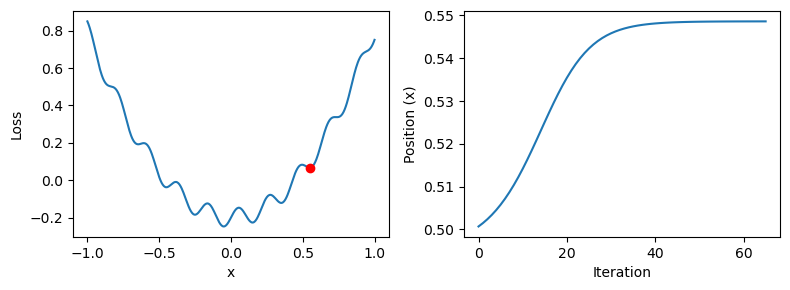

In [17]:
class GradientDescentOptimizer:

    def __init__(self, learning_rate=0.1, max_iter=1000, tolerance=1e-6, store_history=False):

        self.learning_rate = learning_rate

        self.max_iter = max_iter
        self.tolerance = tolerance
        self.store_history = store_history
        if self.store_history:
            self.history = list()

    def optimize(self, df, x0):
        x = x0
        for i in range(self.max_iter):

            x_new = x - self.learning_rate * df(x)

            if np.linalg.norm(x_new - x) < self.tolerance:
                break
            
            x = x_new

            if self.store_history:
                self.history.append(x_new)

        return x

# def loss(x):
#     return 0.5 * x**2 - 0.2

loss = lambda x: 0.5 * x**2 - 0.2
loss_grad = lambda x: x

loss = lambda x: x**2 + 0.05 * np.sin(30 * x) - 0.2
loss_grad = lambda x: 2 * x + 0.05 * 30 * np.cos(30 * x)

# optimizer = GradientDescentOptimizer(store_history=True, learning_rate=2.0)
optimizer = GradientDescentOptimizer(store_history=True, learning_rate=0.005)
x_opt = optimizer.optimize(loss_grad, 0.5)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(xx, loss(xx))
plt.plot(x_opt, loss(x_opt), 'ro')
plt.xlabel('x')
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(optimizer.history)
plt.xlabel('Iteration')
plt.ylabel('Position (x)')

plt.tight_layout()

Text(0, 0.5, 'x')

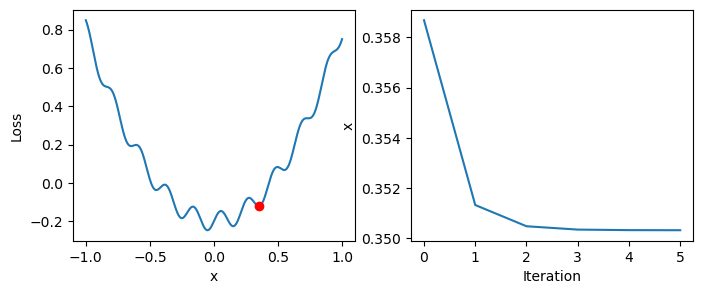

In [20]:
loss = lambda x: x**2 + 0.05 * np.sin(30 * x) - 0.2
loss_grad = lambda x: 2 * x + 0.05 * 30 * np.cos(30 * x)

## Solve optimization
optimizer = GradientDescentOptimizer(learning_rate=0.02, store_history=True)
x_opt = optimizer.optimize(loss_grad, 0.4)

## Plot loss
xx = np.linspace(-1, 1, 500)
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(xx, loss(xx))
plt.plot(x_opt, loss(x_opt), 'ro')
plt.xlabel('x')
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(optimizer.history)
plt.xlabel('Iteration')
plt.ylabel('x')


Text(0, 0.5, 'x')

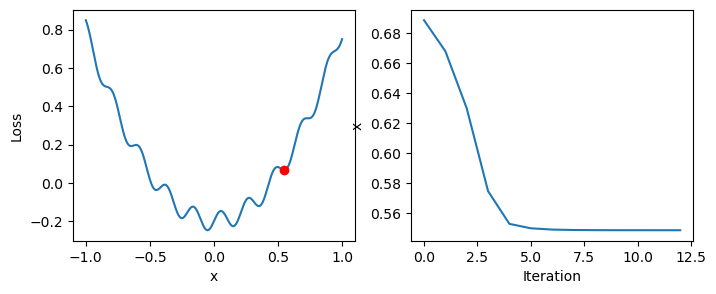

In [22]:
## Solve optimization
optimizer = GradientDescentOptimizer(learning_rate=0.02, store_history=True)
x_opt = optimizer.optimize(loss_grad, 0.7)

## Plot loss
xx = np.linspace(-1, 1, 500)


plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(xx, loss(xx))
plt.plot(x_opt, loss(x_opt), 'ro')
plt.xlabel('x')
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(optimizer.history)
plt.xlabel('Iteration')
plt.ylabel('x')

### Modifying gradient descent for non-convex functions

We can add *momentum* to the optimizer, so that it keeps a memory of past timesteps and bearings

$$
v \leftarrow \eta \dfrac{df}{dx} + \alpha\, v
$$

$$
x \leftarrow x - v
$$

In the units on numerical integration, we will revisit the idea of optimization as solving an initial value problem

Text(0, 0.5, 'x')

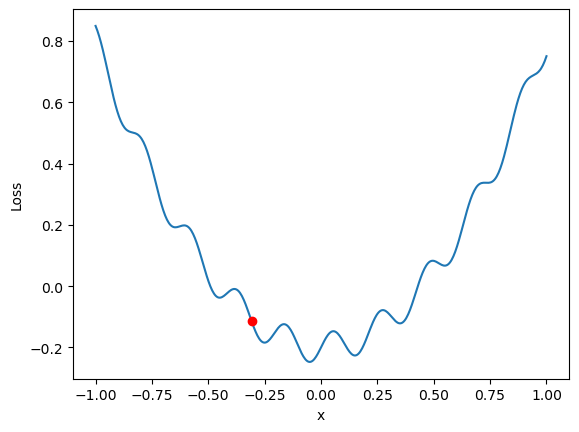

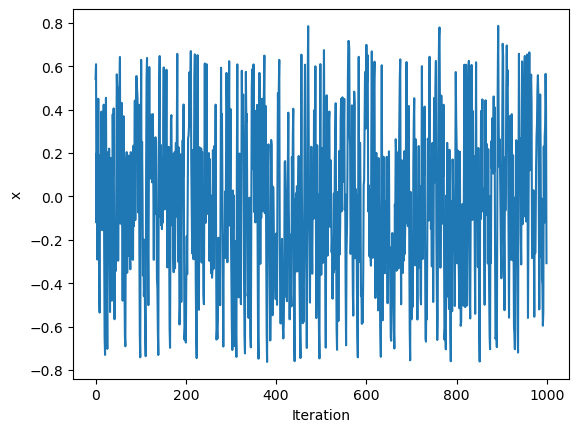

In [55]:
class GradientDescentMomentumOptimizer:
    
        def __init__(self, learning_rate=0.1, alpha=0.9, max_iter=1000, tolerance=1e-6, store_history=False):
            self.learning_rate = learning_rate
            self.alpha = alpha
            self.max_iter = max_iter
            self.tolerance = tolerance
            self.store_history = store_history
            if self.store_history:
                self.history = list()
    
        def optimize(self, df, x0):
            x = x0
            v = 0
            for i in range(self.max_iter):
                
                v = self.alpha * v + self.learning_rate * df(x)
                x_new = x - v

                if np.linalg.norm(x_new - x) < self.tolerance:
                    break
                x = x_new
    
                if self.store_history:
                    self.history.append(x_new)
    
            return x

# loss = lambda x: 0.5 * x**2 - 0.2
# loss_grad = lambda x: x

loss = lambda x: x**2 + 0.05 * np.sin(30 * x) - 0.2
loss_grad = lambda x: 2 * x + 0.05 * 30 * np.cos(30 * x)


## Solve optimization
optimizer = GradientDescentMomentumOptimizer(learning_rate=0.3, alpha=0.2, store_history=True)
x_opt = optimizer.optimize(loss_grad, 0.5)

## Plot loss
xx = np.linspace(-1, 1, 500)
plt.figure()
plt.plot(xx, loss(xx))
plt.plot(x_opt, loss(x_opt), 'ro')
plt.xlabel('x')
plt.ylabel("Loss")

plt.figure()
plt.plot(optimizer.history)
plt.xlabel('Iteration')
plt.ylabel('x')

When does gradient descent fail?

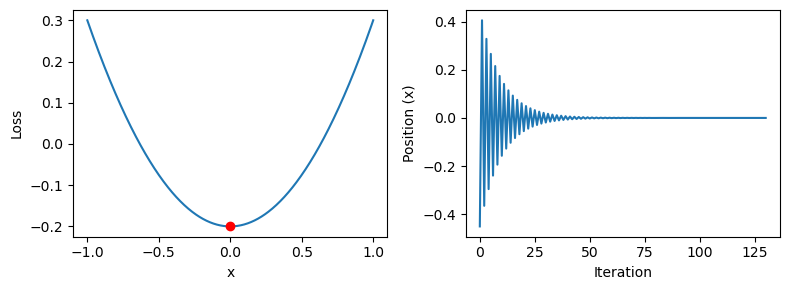

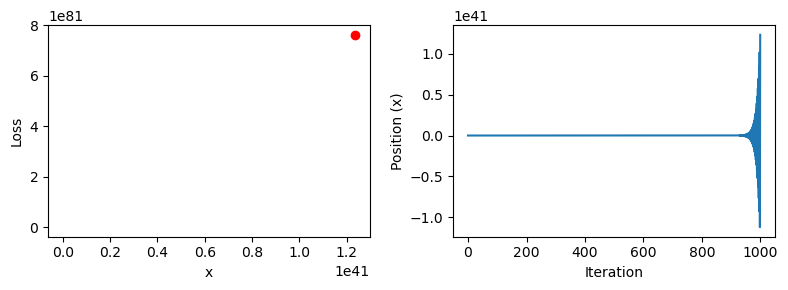

In [35]:
loss = lambda x: 0.5 * x**2 - 0.2
loss_grad = lambda x: x

for lr in [1.9, 2.1]:
    # optimizer = GradientDescentOptimizer(store_history=True, learning_rate=2.0)
    optimizer = GradientDescentOptimizer(store_history=True, learning_rate=lr)
    x_opt = optimizer.optimize(loss_grad, 0.5)

    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.plot(xx, loss(xx))
    plt.plot(x_opt, loss(x_opt), 'ro')
    plt.xlabel('x')
    plt.ylabel("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(optimizer.history)
    plt.xlabel('Iteration')
    plt.ylabel('Position (x)')

    plt.tight_layout()

### The sharpness bound

Gradient descent fails to converge when the learning rate exceeds a threshold. If we imagine the discrete time dynamics in the quadratic case, the force acting on the particle is proportional to the distance from the minimum, $F = -kx$. If we take a discrete time step of size $\Delta t$, then the position at the next timestep the absence of momentum is given by
$$
    x(t + \Delta t) = x(t) - k x(t).
$$

We know that this system has a fixed point when $x(t + \Delta t) = x(t)$,
$$
    x(t) = x(t) - k x(t).
$$
corresponding to the equilibrium,
$$
    x(t) = 0.
$$

What about oscillations? We consider the case of a period-2 oscillation, in which case $x(t + 2\Delta t) = x(t)$. We start by writing out the first two steps of the dynamics:
$$
    x(t + \Delta t) = x(t) - k x(t).
$$
$$
    x(t + 2\Delta t) = x(t + \Delta t) - k x(t + \Delta t).
$$
We then use these and the condition $x(t + 2\Delta t) = x(t)$ to eliminate all appearances of $x(t + \Delta t)$, yielding
$$
    x(t) = x(t) - 2 k x(t) + k^2 x(t).
$$
$$
    0 = - 2 k  + k^2 .
$$
the system thus exhibits period-2 oscillations when $k=2$. When $k > 2$, the oscillations will tend to grow (the optimizer overshoots and the limit cycle grows), while when $k < 2$, the oscillations will tend to shrink (the optimizer undershoots and converges to the fixed point). In general, the critical value of $\eta$ at which the optimizer becomes unstable is given by $\eta = 2 / f''$, where $f$'' is the curvature of the loss function at the minimum. This is known as the *sharpness bound*.


The sharpness bound is a key demonstration of a core idea in optimization: second order information, when available, can be very useful for controlling the rate of optimization. This motivates the development of second-order methods.

<br><br><br><br><br><br><br><br><br><br><br>

## Second-order methods and Newton's method

Newton's method is a *second order method*, which aims to improve convergence using information about the local geometry of a loss landscape. Suppose that our optimizer's initial guess is $x_k$ and our objective function is $f(x)$. We perform a second-order Taylor expansion around the guess,
$$
    f(x_{k}+ h)\approx f(x_{k})+f'(x_{k})h +{\frac {1}{2}}f''(x_{k})h^{2}.
$$
We want to minimize this approximated local function in $h$,
$$
    \displaystyle 0={\frac {\rm {d}}{{\rm {d}} h}}\left(f(x_{k})+f'(x_{k})h+{\frac {1}{2}}f''(x_{k})h^{2}\right)=f'(x_{k})+f''(x_{k})h,
$$
Solving this equation, we arrive at 
$$
h^* = -{\frac {f'(x_{k})}{f''(x_{k})}},
$$

Having optimized the approximant, we now update the position of $x$,
$$
x_{k+1} = x_{k} + h^* = x_{k} - {\frac {f'(x_{k})}{f''(x_{k})}}.
$$

Basically, in a single timestep Newton's method we approximate the function locally as a parabola, and we then jump to the optimum of that parabolic approximant. Newton's method therefore consists of optimizing a global function by optimizing a series of local approximants.

<br><br>

### What if we don't know the derivatives of $f(x)$?

In our previous examples, we've taken for granted that we have a function available that gives the exact value at the derivative at any point $x4 on the landscape. However, this is not always the case. We can always call the loss function at nearby points, in order to estimate the derivative.
$$
    f'(x) \approx \dfrac{f(x + \Delta x / 2) - f(x - \Delta x / 2)}{\Delta x}
$$
$$
f''(x) \approx \dfrac{f(x + \Delta x) - 2 f(x) + f(x - \Delta x)}{\Delta x^2}
$$
where $\Delta x / x \ll 1$. 

Here we have used central finite differences, but we could also use forward finite differences
$$
    f'(x) \approx \dfrac{f(x + \Delta x) - f(x)}{\Delta x}
$$
$$
    f''(x) \approx \dfrac{f(x + 2 \Delta x) - 2 f(x + \Delta x) + f(x)}{\Delta x^2}
$$
Or, analogously, backwards finite differences.There also exist [higher-order finite difference approximations](https://en.wikipedia.org/wiki/Finite_difference), as well as multivariate generalizations. Notice how the coefficients of the first and second derivatives are Pascal's triangle. Newton's method with a finite difference approximation of the second derivaive is sometimes called the "secant" method.

### Why is differentiability important?

A key goal of modern machine learning objective functions and network architectures is to ensure that the loss function is differentiable with respect to all of the parameters of the model, so that gradients can be computed exactly. Why not just use finite difference approximations? For one, finite difference approximations are not exact, tend to fail when we need them to be the most accurate, such as in rapidly changing regions of the landscape. More importantly, finite difference approximations scale poorly with dimensionality. In 1D, we had to call the objective function five times in Newton's method just to get first-order finite difference operators for the first and second derivatives of the potential. For a $d$-dimensional input space, a first-order central finite difference approximation of the gradient requires $2 d$ calls to the objective function, while a second-order finite difference approximation of the Hessian requires $2 d^2 + 1$ calls to the objective function.

<br><br><br><br><br><br><br><br><br><br><br>

Text(0, 0.5, 'x')

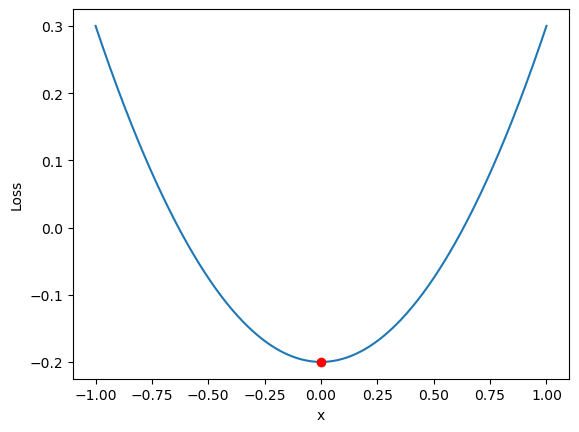

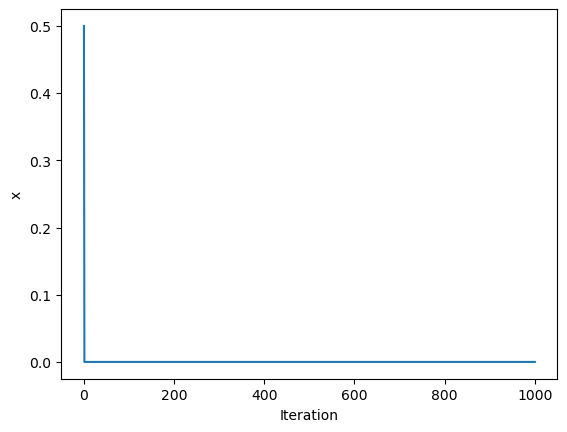

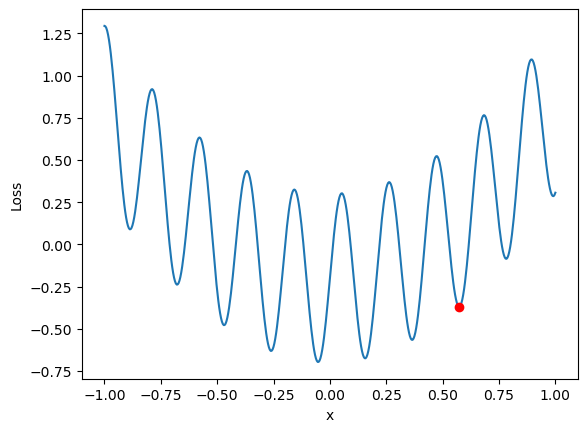

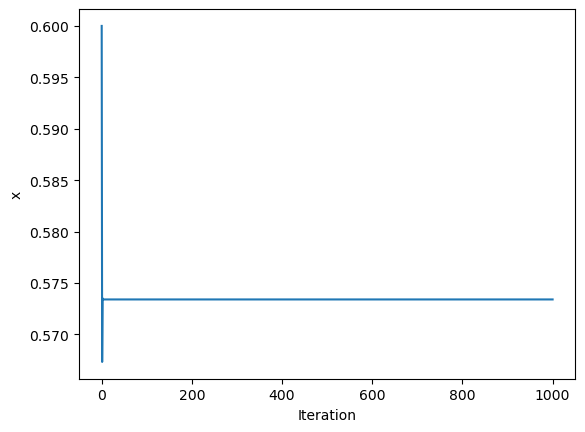

In [ ]:
def finite_difference(f, x, dx=1e-5, order=1):
    """
    Compute the derivative of a function using centered finite differences

    Args:
        f: The function to differentiate
        x: The point at which to differentiate
        dx: The step size
        order: The order of the derivative to compute
    """
    if order == 1:
        return (f(x + dx / 2) - f(x - dx / 2)) / dx
    elif order == 2:
        return (f(x + dx) - 2 * f(x) + f(x - dx)) / dx**2
    else:
        raise ValueError('Only first and second order derivatives are supported')

class NewtonOptimizer:
    """
    Newton's method for finding the optima of a function in one dimension

    Parameters:
        tolerance (float): The tolerance for the stopping criterion
        max_iterations (int): The maximum number of iterations to perform
        store_history (bool): Whether to store the history of the optimization
    """
    def __init__(self, tolerance=1e-6, max_iterations=1000, store_history=False):
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.store_history = store_history
        if store_history:
            self.history = list()

    def optimize(self, f, x0, df=None):

        x = x0

        if self.store_history:  self.history.append(np.copy(x))
        for _ in range(self.max_iterations):

            # Approximate the derivatives with finite differences
            fd = finite_difference(f, x, order = 1)
            fdd = finite_difference(f, x, order = 2)
            x = x - fd / fdd


            ## Stop early if the local concavity is zero
            if np.abs(fdd) < self.tolerance:
                break
            

            if self.store_history: self.history.append(np.copy(x))
        return x


## Convex function
loss = lambda x: 0.5 * x**2 - 0.2
optimizer = NewtonOptimizer(store_history=True)
xstar = optimizer.optimize(loss, 0.5)

plt.figure()
plt.plot(xx, loss(xx))
plt.plot(xstar, loss(xstar), 'ro')
plt.xlabel('x')
plt.ylabel("Loss")

plt.figure()
plt.plot(optimizer.history)
plt.xlabel('Iteration')
plt.ylabel('x')

# ## Non-convex function
loss = lambda x :  x**2 + 0.5 * np.sin(30 * x) - 0.2
optimizer = NewtonOptimizer(store_history=True)
xstar = optimizer.optimize(loss, 0.6)

plt.figure()
plt.plot(xx, loss(xx))
plt.plot(xstar, loss(xstar), 'ro')
plt.xlabel('x')
plt.ylabel("Loss")

plt.figure()
plt.plot(optimizer.history)
plt.xlabel('Iteration')
plt.ylabel('x')


#### Interpreting the Newton optimizer

We can think of the Newton optimizer as a *second order method*. The update rule for $x$ was

$$
    x \leftarrow x - {\frac{f'}{f''}}.
$$

The numerator of the update is just the local gradient step: we take a step in the direction of descent, at a rate proportional to the slope along that direction. The denominator we can interpret as an "adaptive learning rate": we take larger steps as the local landscape gets flatter, and smaller steps in very convex areas.

Newton's method is not quite as straightforward to physically interpret as gradient descent. We are still minimizing some potential function, but now the relaxation rate depends inversely on the local curvature of the potential function. In first-order dynamics, the learning rate inverts the damping constant, so Newton's method is like a system where the damping constant is proportional to the curvature of the potential function.

<br><br><br><br><br><br><br><br><br><br>